<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">TP : Filtre ALI
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Notes de calcul
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt

# Mesures

In [2]:
# propriétés des dipôles utilisés
R1 = 1.e3 # en ohm
u_R1 = .05e3

R2 = 10.e3 # en ohm
u_R2 = .05e3

C = 100e-9 # en farad
u_C = .5e-9

In [3]:
## Données expérimentales étudiants
# fréquences choisies
f = np.array([5, 10, 30, 50, 100, 200, 400, 600, 800, 900, 950, 1000, 1050, 1100, 1200, 1400, 1600, 1800, 2000, 3000, 4000, 5000])
u_f = np.array([.1, .11, .03, .05, .3, 0.4, 2, 2.4, 2.1, 2.5, 2.4, 2, 5, 4, 5, 4, 8, 12, 11, 17, 32, 25])

# tensions d'entrée mesurées
Ue=np.array([1.42, 1.42, 1.42, 1.48, 1.42,1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42 ])
u_Ue=np.array(len(Ue)*[.01])
# tensions de sortie mesurées
Us=np.array([14.2, 14.2, 13.8, 13.4, 12, 8.8, 5.36, 3.76, 2.80, 2.50, 2.40, 2.28, 2.180, 2.080, 1.90, 1.66, 1.46, 1.32, 1.2, .776, .5840, .4720 ])
u_Us=np.array([.08, .08,.1, .1, .08, .08, .08, .08, .08, .02, .02, .04, .02, .02, .02, .04, .02, .04, .04, .008, .008, .008 ])

print(len(f), len(u_f), len(Ue), len(u_Ue), len(Us), len(u_Us))

22 22 22 22 22 22


# Diagramme de Bode

On trace : 
$$G_\text{dB}=20\log\left(\left|\dfrac{u_s}{e}\right|\right)=f(\omega)$$

en échelle logarithlmique.</br>

Puis on cherche à interpoler deux portions de droites sur les parties $\left[0, \omega_c \right[$ et $\left]\omega_c, +\infty \right[$. Ces droites forment le diagramme de Bode <i>asymptotique</i>.

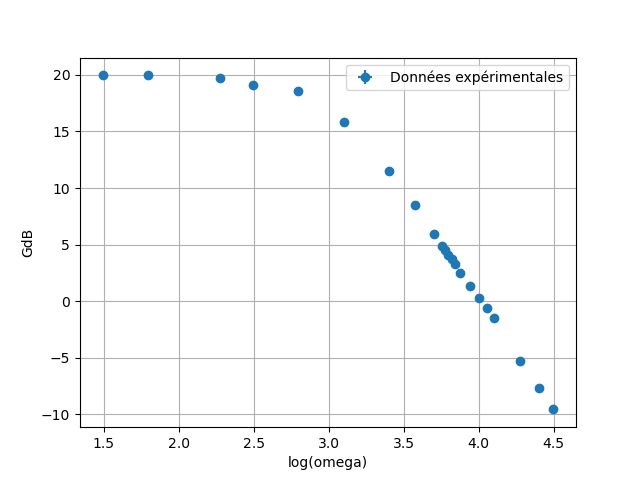

In [4]:
# paramètre de simulation MonteCarlo
N=10000

# listes de stockages
GdB_MC, u_GdB_MC = [], []
x_MC , u_x_MC= [], []

for j in range(len(f)):
    GdB, x = [], []
    for i in range(N):
        GdB.append(20*np.log10((Us[j]+u_Us[j]*np.random.uniform(-1,1))/(Ue[j]+u_Ue[j]*np.random.uniform(-1,1))))
        x.append(np.log10(2*np.pi*(f[j]+u_f[j]*np.random.uniform(-1,1))))
    GdB_MC.append(np.mean(GdB))
    u_GdB_MC.append(np.std(GdB, ddof=1))
    x_MC.append(np.mean(x))
    u_x_MC.append(np.std(x, ddof=1))

# Tracé des points expérimentaux et de l'incertitude de mesure reconstruite par MC
plt.figure()
plt.errorbar(x_MC, GdB_MC, xerr=u_x_MC, yerr = u_GdB_MC, fmt='o',label="Données expérimentales")
plt.xlabel("log(omega)")
plt.ylabel("GdB")
plt.legend()
plt.grid(True)
plt.show()

On peut ensuite chercher à déterminer la pente à BF (3 premiers points) et HF (15 derniers points) en utilisant la méthode `polyfit`de `numpy`.

In [5]:
## Basse fréquence 
# Déclaration des tableaux de stockage
aBF_fit=[]
bBF_fit=[]
nb_BF=3
# Calcul des N pentes et ordonnées à l'orgine par la méthode polyfit de numpy
for i in range(N):
    z=np.polyfit(np.array(x_MC[:nb_BF]+u_x_MC[:nb_BF]*np.random.uniform(-1,1,len(x_MC[:nb_BF]))), np.array(GdB_MC[:nb_BF]+u_GdB_MC[:nb_BF]*np.random.uniform(-1,1,len(GdB_MC[:nb_BF]))),1)
    aBF_fit.append(z[0])
    bBF_fit.append(z[1])

# Calcul de la moyenne et incertitude-type de la pente a et de l'ordonnée à l'origine b
aBF_fit_moy=np.mean(aBF_fit)
u_aBF_fit=np.std(aBF_fit,ddof=1)

bBF_fit_moy=np.mean(bBF_fit)
u_bBF_fit=np.std(bBF_fit, ddof=1)


## Haute fréquence
# Déclaration des tableaux de stockage
aHF_fit=[]
bHF_fit=[]
nb_HF = 15

# Calcul des N pentes et ordonnées à l'orgine par la méthode polyfit de numpy
for i in range(N):
    z=np.polyfit(np.array(x_MC[nb_HF:]+u_x_MC[nb_HF:]*np.random.uniform(-1,1,len(x_MC[nb_HF:]))), np.array(GdB_MC[nb_HF:]+u_GdB_MC[nb_HF:]*np.random.uniform(-1,1,len(GdB_MC[nb_HF:]))),1)
    aHF_fit.append(z[0])
    bHF_fit.append(z[1])

# Calcul de la moyenne et incertitude-type de la pente a et de l'ordonnée à l'origine b
aHF_fit_moy=np.mean(aHF_fit)
u_aHF_fit=np.std(aHF_fit,ddof=1)

bHF_fit_moy=np.mean(bHF_fit)
u_bHF_fit=np.std(bHF_fit, ddof=1)

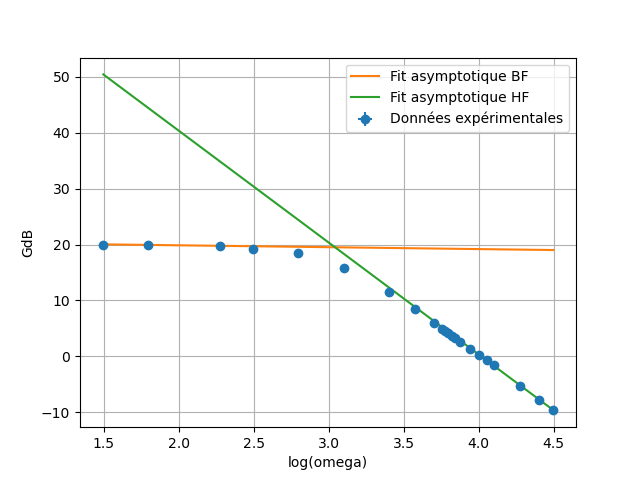

La valeur de la pente à HF est de  -20.0 +/- 0.12



In [6]:
# Calcul du nuage de points associé à la droite de régression calculée précédemment
x=np.linspace(np.min(x_MC), np.max(x_MC), 1000)
yBF=aBF_fit_moy*x + bBF_fit_moy
yHF=aHF_fit_moy*x+bHF_fit_moy

# Tracé du nuage de points associé aux valeurs possibles de log(omega) et de GdB
plt.figure()
plt.errorbar(x_MC, GdB_MC, xerr=u_x_MC, yerr = u_GdB_MC, fmt='o',label="Données expérimentales")
plt.plot(x,yBF, label="Fit asymptotique BF")
plt.plot(x,yHF, label="Fit asymptotique HF")
plt.xlabel("log(omega)")
plt.ylabel("GdB")
plt.legend()
plt.grid(True)
plt.show()

print("La valeur de la pente à HF est de ",format(aHF_fit_moy,"#.1f"), "+/-",format(u_aHF_fit,"#.2f"))
print()

# Pulsation de coupure

L'étude du circuit permet d'établir que la pulsation de coupure théorique est :
$$\omega_c=\frac{1}{R_2C}$$

In [7]:
# Valeur déduite de R et C avec reconstruction de l'incertitude de mesure sur omega_c
N=100000
omega_store = []
for i in range(N):
    omega_store.append(1/((R2+u_R2*np.random.uniform(-1,1))*(C+u_C*np.random.uniform(-1,1))))

omega_c = np.mean(omega_store)
u_omega_c = np.std(omega_store, ddof=1)

# Valeur déduite du tracé de la fonction de transfert par la méthode de l'intersection des courbes asymptotiques
x_exp = [-(bBF_fit[i]-bHF_fit[i])/(aBF_fit[i]-aHF_fit[i]) for i in range(len(bBF_fit))]

omega_c_fit = np.mean(10**(np.array(x_exp)))
u_omega_c_fit = np.std(10**(np.array(x_exp)), ddof=1)

print("La valeur théorique de la pulsation de coupure est : ",format(omega_c,"#.2e"), "+/-",format(u_omega_c,"#.3e"), "rad/s")
print("La valeur expérimentale de la pulsation de coupure est : ",format(omega_c_fit,"#.2e"), "+/-",format(u_omega_c_fit,"#.3e"), "rad/s")

La valeur théorique de la pulsation de coupure est :  1.00e+03 +/- 4.080e+00 rad/s
La valeur expérimentale de la pulsation de coupure est :  1.10e+03 +/- 2.058e+01 rad/s


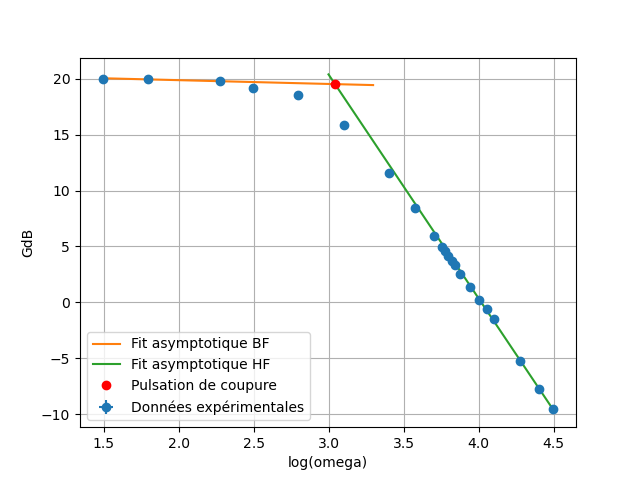

In [8]:
# Tracé du nuage de points associé aux valeurs possibles de log(omega) et de GdB
plt.figure()
plt.errorbar(x_MC, GdB_MC, xerr=u_x_MC, yerr = u_GdB_MC, fmt='o',label="Données expérimentales")
plt.plot(x[:600],yBF[:600], label="Fit asymptotique BF")
plt.plot(x[500:],yHF[500:], label="Fit asymptotique HF")
plt.plot(np.mean(np.array(x_exp)),aHF_fit_moy*np.mean(np.array(x_exp))+bHF_fit_moy, 'o',color='r', label="Pulsation de coupure")
plt.xlabel("log(omega)")
plt.ylabel("GdB")
plt.legend()
plt.grid(True)
plt.show()

# Calcul du taux d'amplification statique

D'après la fonction de transfert, le taux d'amplification statique est $\frac{R_2}{R_1}$, dont on peuit calculer la valeur théorique à partir des valeurs de ces deux résistances, ainsi que la valeur expérimentale en mesurant l'ordonnée à l'origine de la courbe asymtptotique du diagramme de Bode à basse fréquence qui vaut $20\log\frac{R_2}{R_1}$.

In [9]:
# Valeur déduite de R1 et R2 avec reconstruction de l'incertitude de mesure
N=100000
mu0_store = []
for i in range(N):
    mu0_store.append((R2+u_R2*np.random.uniform(-1,1))/(R1+u_R1*np.random.uniform(-1,1)))

mu0 = np.mean(mu0_store)
u_mu0 = np.std(mu0_store, ddof=1)

# Valeur déduite du tracé de la fonction de transfert par la méthode de l'ordonnée à l'origine à TBF
x_exp = bBF_fit

mu0_fit = np.mean(10**(np.array(x_exp)/20))
u_mu0_fit = np.std(10**(np.array(x_exp)/20), ddof=1)

print("La valeur théorique de l'amplification statique est : ",format(mu0,"#.1e"), "+/-",format(u_mu0,"#.2e"))
print("La valeur expérimentale de l'amplification statique est : ",format(mu0_fit,"#.1e"), "+/-",format(u_mu0_fit,"#.2e"))

La valeur théorique de l'amplification statique est :  1.0e+01 +/- 2.91e-01
La valeur expérimentale de l'amplification statique est :  1.1e+01 +/- 1.14e-01


# Conclusions

In [10]:
print("L'écart relatif entre valeur mesurée et calculée de la pente est :",format(100*np.abs((-20-aHF_fit_moy)/20),"#.2f"),"%")
print("L'écart relatif entre valeur mesurée et calculée de la pulsation de coupure est :",format(100*np.abs((omega_c-omega_c_fit)/omega_c),"#.2f"),"%")
print("L'écart relatif entre valeur mesurée et calculée de l'amplification statique est :",format(100*np.abs((mu0-mu0_fit)/mu0),"#.2f"),"%")

L'écart relatif entre valeur mesurée et calculée de la pente est : 0.06 %
L'écart relatif entre valeur mesurée et calculée de la pulsation de coupure est : 10.19 %
L'écart relatif entre valeur mesurée et calculée de l'amplification statique est : 6.43 %
